<a href="https://colab.research.google.com/github/vivek-VU21CSEN0100359/OIBSIP/blob/main/Project_1_D1_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install git

!git clone https://github.com/vivek-VU21CSEN0100359/OIBSIP.git

%cd OIBSIP
!ls


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Cloning into 'OIBSIP'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 13 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 5.12 KiB | 1.28 MiB/s, done.
/content/OIBSIP
OIBSIP	README.OIBSIP


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("/content/sample_data/retail_sales_dataset.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Add 'Month' column
df['Month'] = df['Date'].dt.month_name()

# Display the first 10 rows
print(df.head(10))

   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   
5               6 2023-04-25     CUST006  Female   45           Beauty   
6               7 2023-03-13     CUST007    Male   46         Clothing   
7               8 2023-02-22     CUST008    Male   30      Electronics   
8               9 2023-12-13     CUST009    Male   63      Electronics   
9              10 2023-10-07     CUST010  Female   52         Clothing   

   Quantity  Price per Unit  Total Amount     Month  
0         3              50           150  November  
1         2             500          1000  February  
2         1            

In [3]:
print(df.dtypes)

# Select only numeric columns for statistical calculations
numeric_df = df.select_dtypes(include=['number'])

# Calculate statistics
mean_values = numeric_df.mean()
median_values = numeric_df.median()
mode_values = numeric_df.mode().iloc[0]  # mode() returns a DataFrame, so use iloc[0] to get the first row
std_dev = numeric_df.std()

# Display statistics
print("Mean:\n", mean_values)
print("Median:\n", median_values)
print("Mode:\n", mode_values)
print("Standard Deviation:\n", std_dev)

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
Month                       object
dtype: object
Mean:
 Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64
Median:
 Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64
Mode:
 Transaction ID     1.0
Age               43.0
Quantity           4.0
Price per Unit    50.0
Total Amount      50.0
Name: 0, dtype: float64
Standard Deviation:
 Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


In [4]:
print(df.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Month'],
      dtype='object')


In [5]:
print(df.head())

   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount     Month  
0         3              50           150  November  
1         2             500          1000  February  
2         1              30            30   January  
3         1             500           500       May  
4         2              50           100       May  


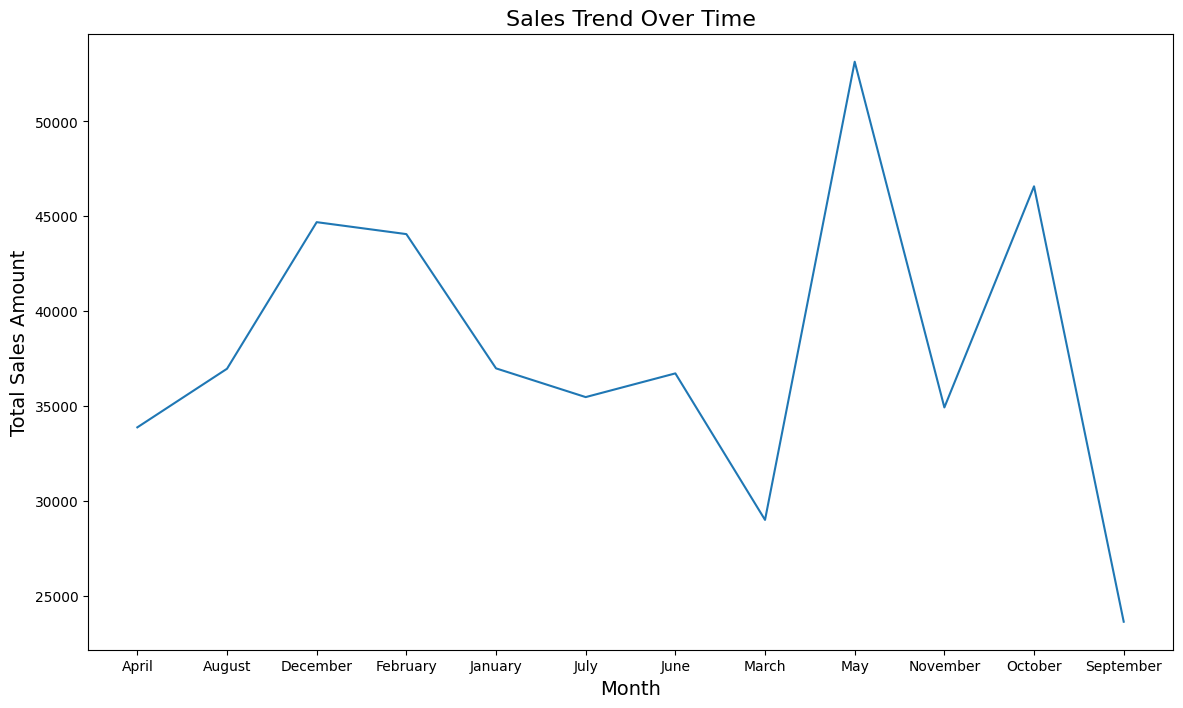

In [6]:
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()

# Plot sales trends
plt.figure(figsize=(14,8))
sns.lineplot(x='Month', y='Total Amount', data=monthly_sales)
plt.title('Sales Trend Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)
plt.show()

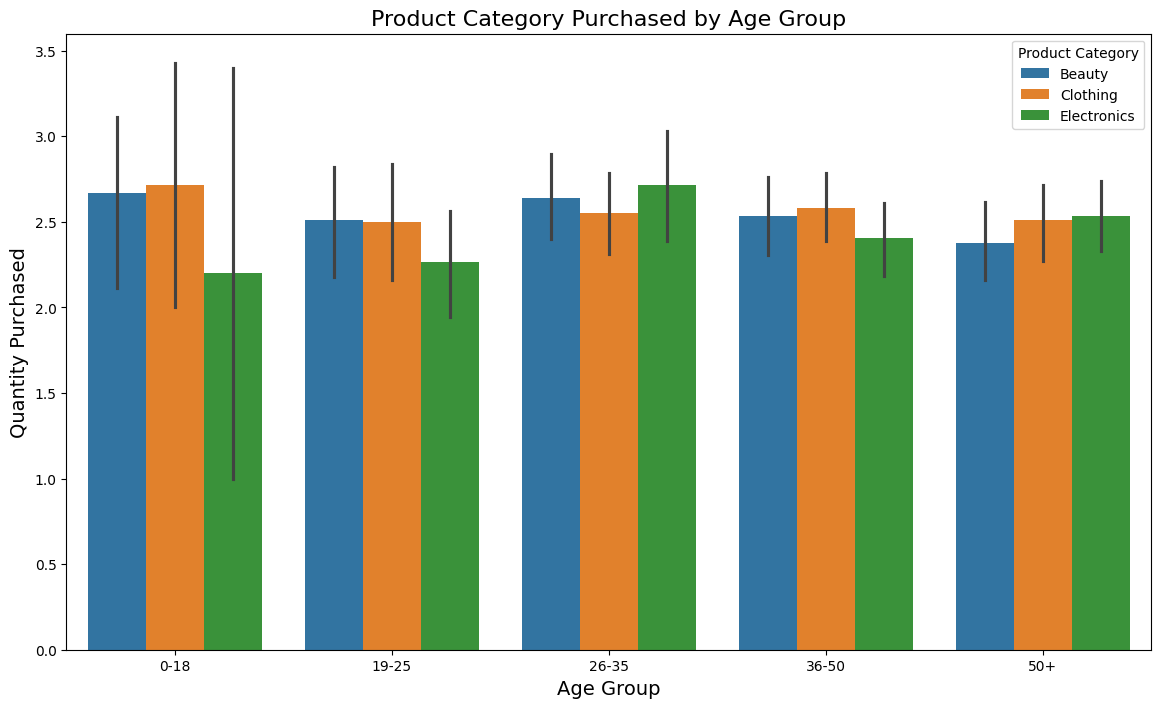

In [7]:
age_groups = pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, 100], labels=['0-18', '19-25', '26-35', '36-50', '50+'])
df['Age Group'] = age_groups

# Group by age group and product category
age_product_sales = df.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().unstack()

# Plot product category purchased by age group
plt.figure(figsize=(14,8))
sns.barplot(x='Age Group', y='Quantity', hue='Product Category', data=df)
plt.title('Product Category Purchased by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Quantity Purchased', fontsize=14)
plt.show()

<Figure size 1200x800 with 0 Axes>

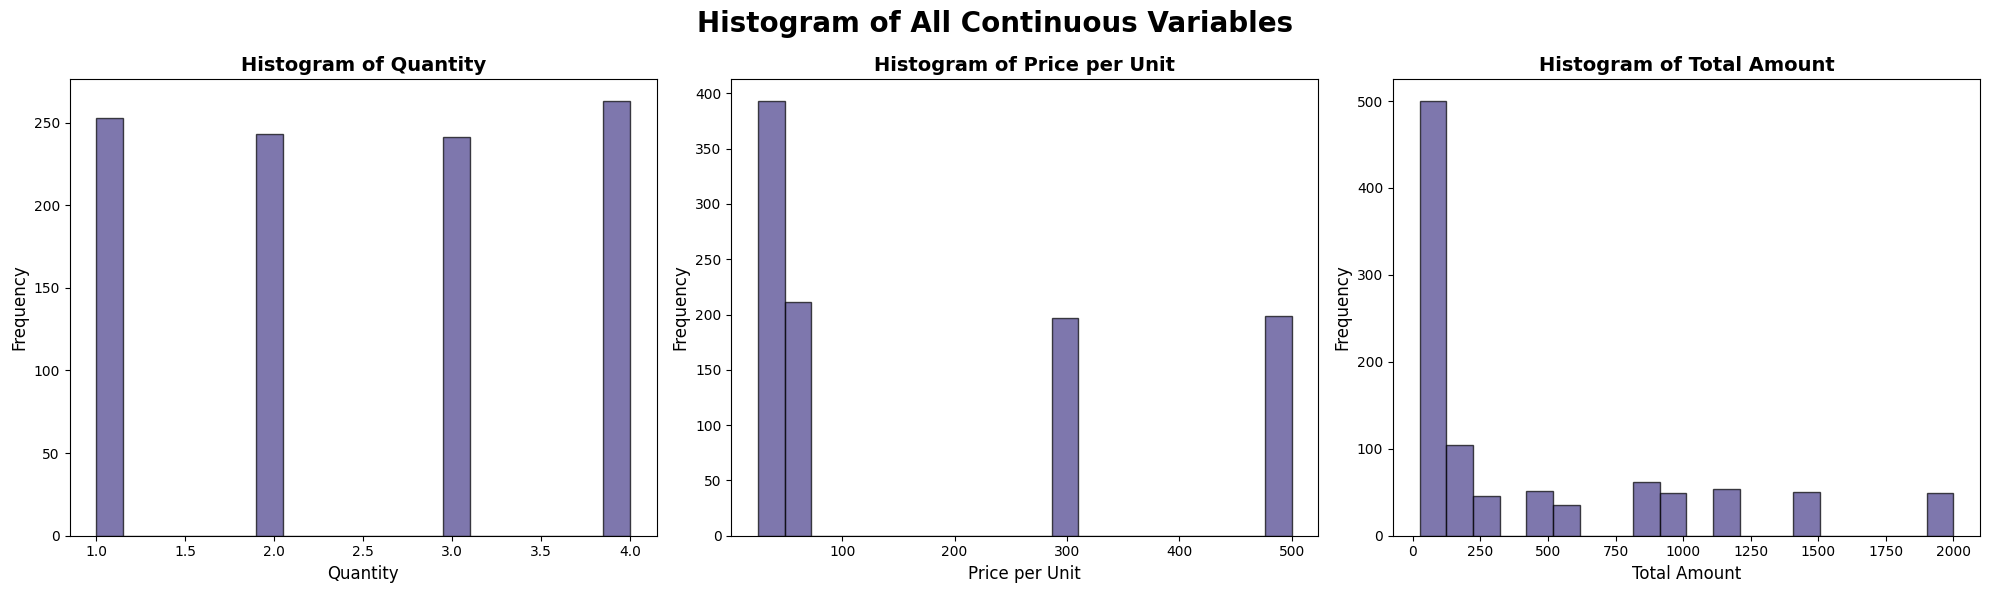

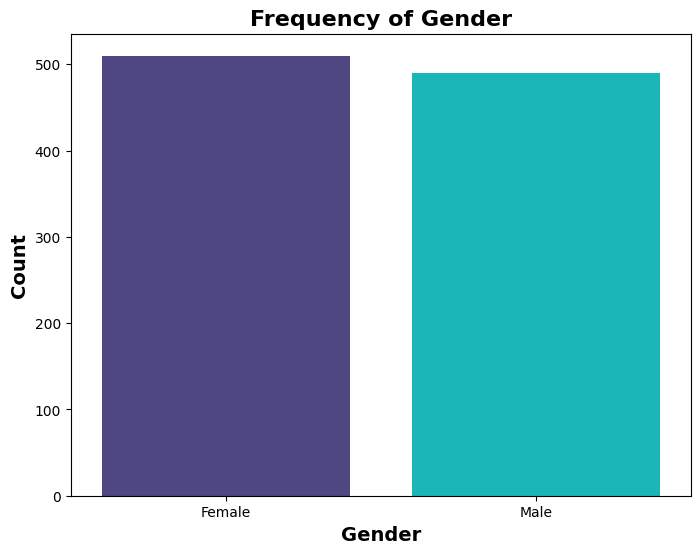

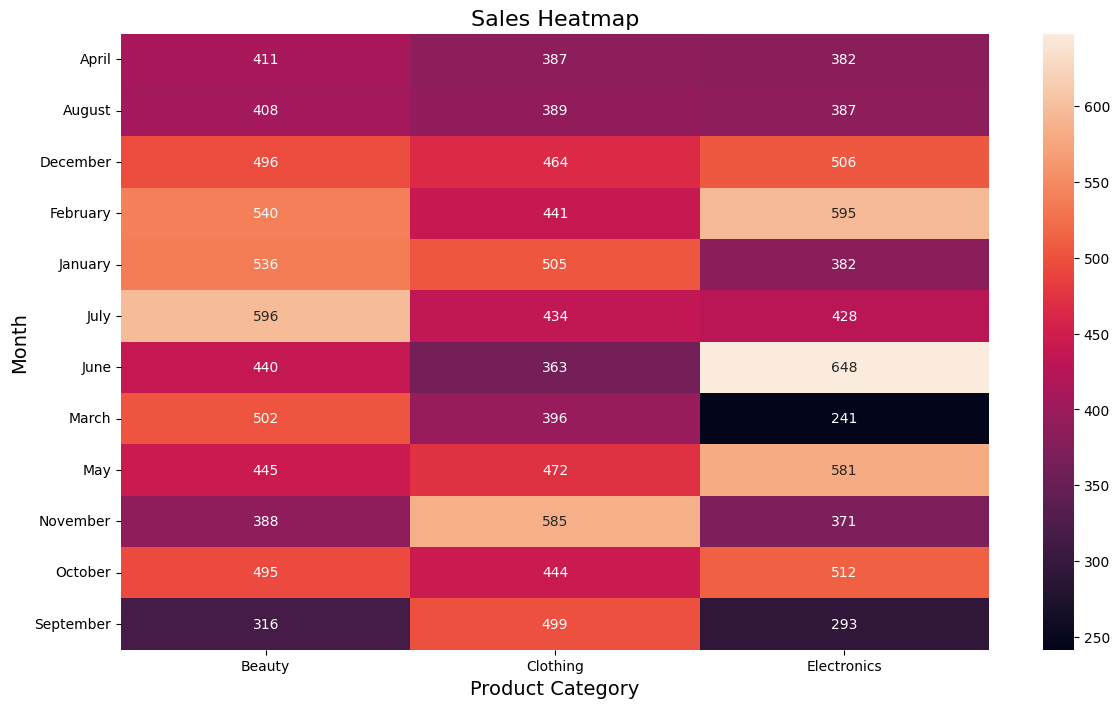

In [8]:
plt.figure(figsize=(12, 8))
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].hist(df['Quantity'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
axs[0].set_title('Histogram of Quantity', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Quantity', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)

axs[1].hist(df['Price per Unit'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
axs[1].set_title('Histogram of Price per Unit', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Price per Unit', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)

axs[2].hist(df['Total Amount'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
axs[2].set_title('Histogram of Total Amount', fontsize=14, fontweight='bold')
axs[2].set_xlabel('Total Amount', fontsize=12)
axs[2].set_ylabel('Frequency', fontsize=12)

plt.suptitle('Histogram of All Continuous Variables', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

# Frequency of gender - barplot
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=['#483D8B', '#00CED1'])
plt.title('Frequency of Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.show()

# Sales of Product Categories per month
heatmap = df.pivot_table(index='Month', columns='Product Category', values='Total Amount')
plt.figure(figsize=(14,8))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title('Sales Heatmap', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.show()

In [9]:
recommendations = """
1. Increase inventory for the Clothing category during May to capitalize on higher sales.
2. Implement targeted marketing campaigns for Electronics, especially towards male customers, to boost revenue.
3. Focus on promotional offers for Beauty products aimed at female customers to drive sales.
4. Monitor and analyze monthly sales trends to anticipate demand and optimize stock levels.
5. Consider demographic-specific marketing strategies, such as promoting products popular among different age groups.
"""

print(recommendations)


1. Increase inventory for the Clothing category during May to capitalize on higher sales.
2. Implement targeted marketing campaigns for Electronics, especially towards male customers, to boost revenue.
3. Focus on promotional offers for Beauty products aimed at female customers to drive sales.
4. Monitor and analyze monthly sales trends to anticipate demand and optimize stock levels.
5. Consider demographic-specific marketing strategies, such as promoting products popular among different age groups.

